# Linear Regression  

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("E:\Machine Learning\data sets\X_and_Y_dataset.csv")
df.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [3]:
df.shape

(300, 2)

In [4]:
df.isnull().sum()  #zero null value

x    0
y    0
dtype: int64

## Exploratory of dataset

In [5]:
df.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


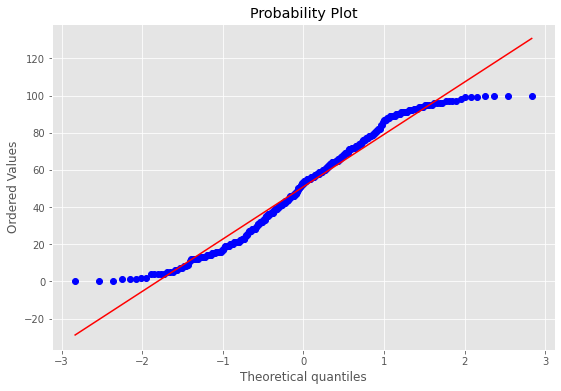

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
plt.style.use("ggplot")
import scipy.stats as stats
stats.probplot(df.x,dist="norm",plot=plt)    #most of the data lyong on red line 
plt.show()                                   #data is normally distributed

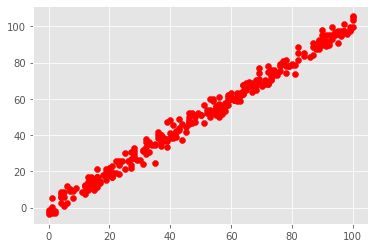

In [7]:
plt.scatter(df.x,df.y,c="Red")

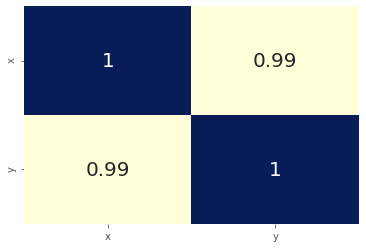

In [8]:
import seaborn as sns     #Both are correlated
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True,cbar=False,annot_kws={"size": 20})

In [9]:
from sklearn.preprocessing import StandardScaler 
std = StandardScaler()
df = std.fit_transform(df)

Standardscaler will helps to improve the accuracy in Regression models.

In [10]:
x = df[:,0].reshape(-1,1)
y = df[:,1].reshape(-1,1)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [12]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(225, 1)
(75, 1)
(225, 1)
(75, 1)


## Model Evaluation

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [14]:
lr.fit(x_train,y_train)
y_pre = lr.predict(x_test)

Text(0.5, 1.0, 'Prediction')

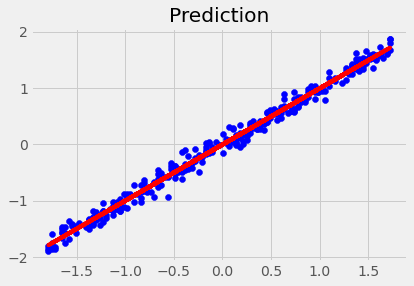

In [15]:
plt.style.use("fivethirtyeight")
plt.plot(x_test,y_pre,color="red")
plt.scatter(x,y,color="blue")
plt.title("Prediction")

In [16]:
from sklearn import metrics 

In [17]:
print("Training Accuracy :")
print("=================")
print("       Mean Squared Error : {:.2f}".format(metrics.mean_squared_error(lr.predict(x_train),y_train)))
print("       Mean Absolute Error : {:.2f}".format(metrics.mean_absolute_error(lr.predict(x_train),y_train)))
print("       R2 Score : {:.2f} %".format((metrics.r2_score(lr.predict(x_train),y_train))*100))

Training Accuracy :
       Mean Squared Error : 0.01
       Mean Absolute Error : 0.08
       R2 Score : 98.89 %


In [18]:
print("Testing Accuracy :")
print("=================")
print("       Mean Squared Error : {:.2f}".format(metrics.mean_squared_error(y_pre,y_test)))
print("       Mean Absolute Error : {:.2f}".format(metrics.mean_absolute_error(y_pre,y_test)))
print("       R2 Score : {:.2f} %".format((metrics.r2_score(y_pre,y_test))*100))

Testing Accuracy :
       Mean Squared Error : 0.01
       Mean Absolute Error : 0.08
       R2 Score : 98.95 %


In [20]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(lr,x,y,cv=5)
print(f"Cross validation : {round(np.mean(cv)*100)} %")

Cross validation : 99.0 %
